In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return (sigmoid(z) * (1 - sigmoid(z)))

def initialize_parameter(input_size, hidden_size, output_size, random=42):
    np.random.seed(random)
    # include bias
    theta1 = np.random.uniform(0, 1, (input_size + 1, hidden_size))
    theta2 = np.random.uniform(0, 1, (hidden_size + 1, output_size))

    return theta1, theta2

def forward(x, theta1, theta2):
    a1 = x
    z2 = np.concatenate((np.array([1]), a1)) @ theta1
    a2 = sigmoid(z2)
    z3 = np.concatenate((np.array([1]), a2)) @ theta2
    return z2, a2, z3

def backward(x, y, z2, a2, z3, theta1, theta2):
    dz3 = z3 - y

    # Gradient for theta2
    dtheta2 = (dz3 * np.concatenate((np.array([1]), a2))).reshape([3,1])

    # Gradient for theta1
    da2 = dz3 * theta2[1:]
    dz2 = da2 * sigmoid_derivative(z2).reshape(2,1)
    dtheta1 = np.outer(dz2, np.concatenate((np.array([1]), x))).reshape([3,2])

    return dtheta1, dtheta2

In [4]:
theta1, theta2 = initialize_parameter(2, 2, 1)
x, y = np.array([2, 1]), np.array([3])
learning_rate = 0.05

In [5]:
iterations = []
loss = []
for i in range(50):
    z2, a2, z3 = forward(x, theta1, theta2)
    dtheta1, dtheta2 = backward(x, y, z2, a2, z3, theta1, theta2)
    theta1 -= learning_rate * dtheta1
    theta2 -= learning_rate * dtheta2

    iterations.append(i)
    loss.append((y-z3)**2)

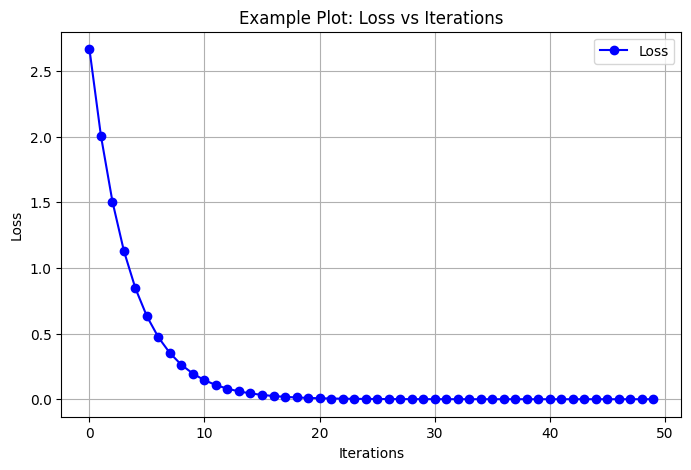

In [ ]:
plt.figure(figsize=(8, 5))  # Optional: Set figure size
plt.plot(iterations, loss, marker='o', linestyle='-', color='b', label="Loss")  # Line plot with markers
plt.title("Example Plot: Loss vs Iterations")  # Add title
plt.xlabel("Iterations")  # Label x-axis
plt.ylabel("Loss")  # Label y-axis
plt.legend()  # Optional: Add legend
plt.grid()  # Optional: Add gridlines
# plt.show()  # Display the plot
plt.savefig('figure1.png', dpi=400)